# NASA: Asteroids Classification

**Acest Notebook a fost preluat/generat din/de ............... astfel**  
**- secventele de cod .... %**  
**- comentariile .... %**  
**Conributia personala a constat în ......................** _(cel putin studierea, traducerea în Ro)_  
**Valorile procentuale de mai sunt aproximative dar reflectă în esență adevărul.**

**1. Descrierea problemei**

Acesta este un set de date publicat de NASA, care conține informații despre asteroizi. Fiecare rând este un asteroid, iar fiecare coloană este o caracteristică a lui (ex: dimensiuni, viteză, etc.). Una dintre coloane (Hazardous) indică dacă asteroidul este periculos pentru Pământ, sau nu.  
Având această coloană, problema este una de clasificare supravegheată, în care trebuie prezis dacă un asteroid este „Periculos” sau „Nepericulos”.

Așadar, obiectivul problemei este de a construi un model care, dat un set de caracteristici ale unui asteroid, prezice dacă este periculos sau nu.

**2. Preprocesarea datelor**

**3. Analiza Explorativă a Datelor**

**4. Modelare de învățare automata**

**5. Compararea și validarea modelelor**

**6. Implementarea**

In [81]:
# Importuri esențiale
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import joblib

In [82]:
# Încarcă datele (asigură-te că fișierul este în același folder cu notebook-ul)
df = pd.read_csv("nasa.csv")  # redenumește fișierul descărcat dacă e cazul
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [83]:
df.shape

(4687, 40)

In [84]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [85]:
df.isnull().sum()  # verifică valori lipsă

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [86]:
# Conversie coloane booleene
df['Hazardous'] = df['Hazardous'].astype(int)

df = df.drop(['Neo Reference ID','Name','Orbit ID','Close Approach Date','Epoch Date Close Approach','Orbit Determination Date'],axis=1)
df = df.drop(['Orbiting Body','Equinox'],axis=1)
df = df.drop(['Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)'
             ,'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 
             'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(lunar)', 
             'Miss Dist.(Astronomical)', 'Miss Dist.(miles)'], axis = 1)
# Separare X și y
X = df.drop("Hazardous", axis=1)
y = df["Hazardous"]

# Normalizare
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df.head()
df.isnull().sum()

Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Relative Velocity km per sec    0
Miss Dist.(kilometers)          0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination                     0
Asc Node Longitude              0
Orbital Period                  0
Perihelion Distance             0
Perihelion Arg                  0
Aphelion Dist                   0
Perihelion Time                 0
Mean Anomaly                    0
Mean Motion                     0
Hazardous                       0
dtype: int64

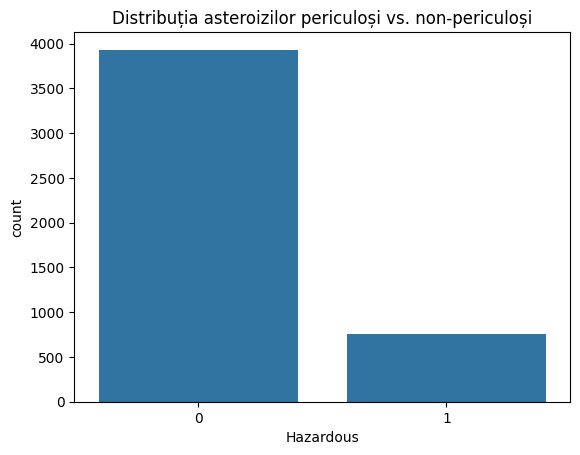

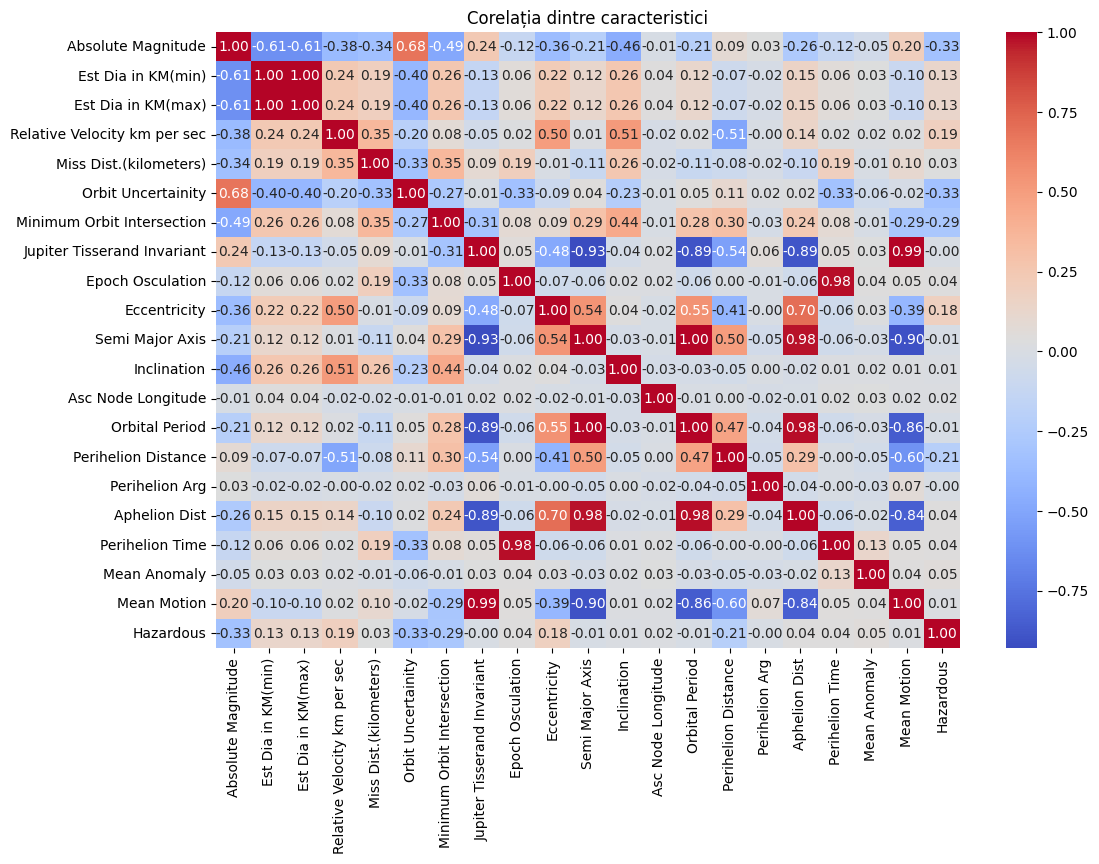

In [87]:
# Distribuția targetului
sns.countplot(x=y)
plt.title("Distribuția asteroizilor periculoși vs. non-periculoși")
plt.show()

# Matrice de corelație
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Corelația dintre caracteristici")
plt.show()

In [88]:
# Împărțirea setului în train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicții și evaluare
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Matrice de confuzie:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       791
           1       0.99      0.99      0.99       147

    accuracy                           1.00       938
   macro avg       1.00      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938

Matrice de confuzie:
 [[790   1]
 [  2 145]]


In [89]:
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy: ", scores.mean())

Cross-validation accuracy:  0.9963739011907986


In [90]:
joblib.dump(model, "asteroid_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
import aplicatie_Crainiciuc_Filaret_Niculai

#aplicatie_Crainiciuc_Filaret_Niculai.predict_from_file()


**7. Concluzii**

**8. Referințe**

**9. Anexa**